In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def Messure(A, B):
    N = len(B)
    s = 0
    for i in range(N):
        for j in range(N):
            s = s + (abs(A[i,j] - B[i,j]))**2

    return np.sqrt(s)

def U_b(x):
    return np.sin(np.pi * x)

def LaPlaS_Simp(L_b, U_b, D_b, l, h, E):
    N = int(l/h) + 1
    x_s = np.zeros((N,N))
    
    x_s[:, 0] = D_b
    for i in range(N):
        x_s[i, N-1] = U_b(i*h)
    x_s[0, :] = L_b
    # x_s[N, :] = R_b        -  По идее должно быть так, но нет - не должно
    
    x = x_s
    k = 0

    dif = 1

    while k < 1000 :
        y = x_s
        for i in range(1, N-1):
            for j in range(1, N-1):
                y[i,j] = (x[i-1,j]+x[i+1,j]+x[i,j-1]+x[i,j+1])/4
        y[-1] = y[-2]
        dif = Messure(x,y)
        x = y
        k+=1

    return (y)

In [11]:
N = int(1/0.5) + 1
x, y = np.zeros((N,N)), np.zeros((N,N))
for i in range(1,N): print(i)

1
2


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.19276140e-06 1.04665692e-05 ... 2.91534170e-02
  3.02670273e-02 3.14107591e-02]
 [0.00000000e+00 1.04053360e-05 2.09728963e-05 ... 5.82785642e-02
  6.05044353e-02 6.27905195e-02]
 ...
 [0.00000000e+00 1.55157006e-04 3.12615290e-04 ... 1.31849615e-01
  1.00366109e-01 6.27905195e-02]
 [0.00000000e+00 1.55065010e-04 3.12429936e-04 ... 1.22493448e-01
  8.47543261e-02 3.14107591e-02]
 [0.00000000e+00 1.55065010e-04 3.12429936e-04 ... 1.22493448e-01
  8.47543261e-02 3.14107591e-02]]


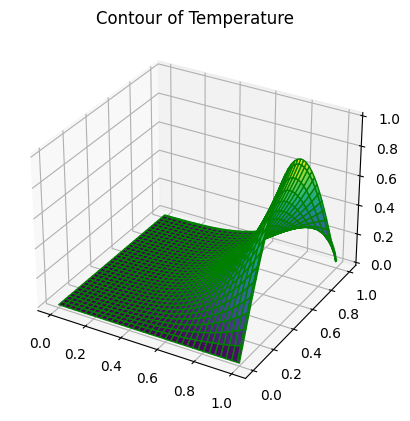

In [12]:
h = 0.01
colorinterpolation = 50
colourMap = plt.cm.jet

x, y = np.linspace(0, 1, int(1/h) + 1), np.linspace(0, 1, int(1/h) + 1)
X, Y = np.meshgrid(x, y)
Z = LaPlaS_Simp(0, U_b, 0, 1, h, 0.0001)

print(Z)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='green')
ax.set_title('Contour of Temperature')
plt.show()


In [9]:
A = [[1, 0, 2],
     [0, 3, 0],
     [4, 0, 5]]

n = len(A)

for i in range(n): 
    for j in range(n): 
        if n-1-i < j: 
            A[i][j],A[n-1-j][n-1-i] = A[n-1-j][n-1-i],A[i][j]

print(A)

[[5, 0, 2], [0, 3, 0], [4, 0, 1]]
